# Using itertools

http://www.blog.pythonlibrary.org/2016/04/20/python-201-an-intro-to-itertools/

In [1]:
"""Index positions and amounts of all combinations adding up to the target amount"""

from itertools import combinations

dif = 17000
amounts = [100000 , 65000 , 7000 , 3000 , 17000 , 10000 , 3000 , 4000]
amounts = [(idx, amount) for idx, amount in enumerate(amounts, start=1)]
totals = (comb for qty in range(2, len(amounts) + 1)
          for comb in combinations(amounts, qty)
          if sum(n[1] for n in comb) == dif
              )
for total in totals:
    print(*total, sep=", ")

(3, 7000), (6, 10000)
(4, 3000), (6, 10000), (8, 4000)
(6, 10000), (7, 3000), (8, 4000)
(3, 7000), (4, 3000), (7, 3000), (8, 4000)


In [ ]:
#itertools

from itertools import cycle,islice, count, repeat, accumulate, compress, chain

for num in count(5):  # infinite counter
    if num == 10:  # need an exit plan
        break
    print(num, end="; ")
print()
for num in islice(count(5), 5):  # limits iterations
    print(num, end="; ")
print()
for letter in islice(cycle('xyz'), 5):
    print(f'{letter}', end="; ")
print()   
for string in repeat('Stuart', 5):  # boring repititions
    print(f'Hi {string}', end="; ")
print()
for num in accumulate(islice(count(0), 10)):
    print(num, end="; ")
print()

nums = [1,2,3]
names = 'fred', 'bob'
for thing in chain(nums, names):
    print(thing, end="; ")
print()

bools = [True, False, True]
for num in compress(nums, bools):
    print(num, end='; ')
print()

In [1]:
from itertools import combinations, filterfalse

def off_target(nums):  # combinations that don't equal target
    return not sum(n for _, n in nums) == dif

def output_matches(totals, amounts):
    print(f"\n\nAmounts that sum to {dif}:\n"
          f"  (from: {', '.join(str(n) for n in amounts)})\n")
    for total in totals:
        for idx, num in total:
            print(f'{idx:4}: {num:5}', end='  ')
        print()


difs = ((17000, [100000 , 65000 , 7000 , 3000 , 17000 , 10000 , 3000 , 4000]), # original
        (10000, [100000 , 65000 , 7000 , 3000 , 17000 , 10000 , 3000 , 4000]), # test
       )

for dif, amounts in difs:
    amounts_idx = [(idx, amount) for idx, amount in enumerate(amounts, start=1)]
    totals = (comb for qty in range(2, len(amounts) + 1)
                      for comb in filterfalse(off_target,
                            (combinations(amounts_idx, qty))))
    output_matches(totals, amounts)



Amounts that sum to 17000:
  (from: 100000, 65000, 7000, 3000, 17000, 10000, 3000, 4000)

   3:  7000     6: 10000  
   4:  3000     6: 10000     8:  4000  
   6: 10000     7:  3000     8:  4000  
   3:  7000     4:  3000     7:  3000     8:  4000  


Amounts that sum to 10000:
  (from: 100000, 65000, 7000, 3000, 17000, 10000, 3000, 4000)

   3:  7000     4:  3000  
   3:  7000     7:  3000  
   4:  3000     7:  3000     8:  4000  


# RPN Calculator using Class

https://www.reddit.com/r/learnpython/comments/fhk6nx/any_way_to_define_a_dictionary_of_methods_within/

In [28]:
class Calculator:

    GUIDE = ''  # placeholder for init

    def __init__(self):
        self.clear()
        self.degrees = True
        self.scimode = False
        self.rpn = True
        self.msg = "h(elp) q(uit)"
        self.err = ""
        self.prompt = "> "
        print(Calculator.GUIDE)

    def __str__(self):
        elements = [self.err, self.msg, f'{self.stack}', self.prompt]
        self.display = ' | '.join(elements)
        return self.display

    @staticmethod
    def is_quit(text):
        return text.lower() in ('q', 'quit', 'exit', 'x')

    def stack_op(self, text):
        if text.lower() in Calculator.OPS:
            self.stack.append(Calculator.OPS[text.lower()][-1])
            return True
        return False

    def stack_num(self, text):
        num = None
        try:
            num = float(text)
            num = int(text)
        except ValueError:
            pass
        if num is None:
            return False
        self.stack.append(num)
        return True                

    def clear(self):
        self.display = ""
        self.memory = 0
        self.stack = []

    def clear_error(self):
        self.err = ""

    def set_msg(self, msg=""):
        self.msg = msg

    def enough_nums(self, required=2):
        """confirm if stack holds sufficient numbers for an operation"""
        if len(self.stack) >= required:
            for n in range(required):
                if not isinstance(self.stack[-1-n], (int, float)):
                    return False
            return True
        return False    

    def entry(self):
        while True:
            response = input(f'{self}')
            self.clear_error()
            if self.is_quit(response):
                return None
            elif self.stack_op(response):
                return True
            elif self.stack_num(response):
                return False
            self.err = 'ERR (unknown)'

    def op_add(self):
        if self.enough_nums():
            print(self.stack)
            self.stack.append(self.stack.pop() + self.stack.pop())
        else:
            self.err = f'ERR (not enough nums)'

    def op_sub(self):
        if self.enough_nums():
            self.stack.append(- self.stack.pop() + self.stack.pop())
        else:
            self.err = f'ERR (not enough nums)'

    def op_mul(self):
        if self.enough_nums():
            self.stack.append(self.stack.pop() * self.stack.pop())
        else:
            self.err = f'ERR (not enough nums)'

    def op_div(self):
        if self.enough_nums():            
            if not self.stack[-1] == 0:
                self.stack.append(self.stack.pop(-2) / self.stack.pop())
            else:
                self.err = f'ERR (div by 0 not allowed) {self.stack}'
        else:
            self.err = f'ERR (not enough nums)'

    def op_del1(self):
        if self.stack:
            self.stack.pop()

    def op_whole(self):
        if self.enough_nums(1):
            self.stack.append(int(self.stack.pop()))
        else:
            self.err = f'ERR (not enough nums)'

    def op_round(self):
        if self.enough_nums():
            self.stack.append(round(self.stack.pop(-2), self.stack.pop()))
        else:
            self.err = f'ERR (not enough nums)'

    def op_swap(self):
        if self.enough_nums(2):
            self.stack.extend((self.stack.pop(), self.stack.pop()))
        else:
            self.err = f'ERR (not enough nums)'

    def op_help(self):
        print(Calculator.GUIDE)

    def work(self):
        while True:
            status = self.entry()
            if status is None:
                return
            elif status:
                op = self.stack.pop()
                op(self)

    OPS = {'+': ('add two numbers', op_add),
        '-': ('subtract top from next down', op_sub),
        '*': ('multipple two numbers', op_mul),
        '/': ('divide 2 down by top', op_div),
        'int': ('truncate top to integer', op_whole),
        'round': ('round 2 down to top decimal places', op_round), 
        'h': ('display hel', op_help),
        'del': ('remove top number', op_del1),
        'swap': ('swap top two numbers', op_swap),
        'q': ('quit Calculator', None),
        }

    DETAILS = ''.join(f'\t{code:5} {desc}\n' for code, (desc, _) in OPS.items()) 

    GUIDE = f'Welcome to our simple RPN Calculator\n\n' \
            f'Operators/Commands:\n{DETAILS}\n'


calc1 = Calculator()
calc1.work()

Welcome to our simple RPN Calculator

Operators/Commands:
	+     add two numbers
	-     subtract top from next down
	*     multipple two numbers
	/     divide 2 down by top
	int   truncate top to integer
	round round 2 down to top decimal places
	h     display hel
	del   remove top number
	swap  swap top two numbers
	q     quit Calculator


[1, 3, 2, 5]
[1, 3, 7]


I realise you've been given a few options already, but a slightly different approach is to put the method names in the dict:

In [ ]:
class Calculator:
    method_aliases = {'+': 'add', 'del': 'del1'} # and so on

    def add(self):
        ...

    def del1(self):
        ...

    def get_method(self, string):
        return getattr(self, self.method_aliases[string])

calculator = Calculator()
calculator.get_method('+')() # this calls calculator.add()

This way you can populate the dict anywhere, regardless of whether the methods have been defined yet or not. This also plays nicely with subclasses. For example if you have a subclass that defines its own add method, that will be called instead of the parent class's method, without having to give the subclass a different method_aliases dict.

Though if you're going to do this kind of thing often, it may be nicer to do some magic with decorators and/or metaclasses to get a nice API like the following:

In [ ]:
@alias_class
class Calculator:
    @alias('+')
    def add(self):
        ...

calculator = Calculator()
calculator['+']()

In [25]:
x = [1,2,3]
x.extend([4,5,6])
x

[1, 2, 3, 4, 5, 6]

There are a number of ways of coding this up, depending on the exact semantics you want.

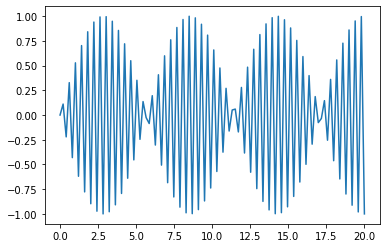

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

p = np.linspace(0, 20, 100)
plt.plot(p, np.sin(15*p))
plt.show()



In [3]:
    density5_01 = np.array([ 0. , 0. , 0. , 0. ,
                    0. , 0. , 0. , 0. ,
                    0. , 0. , 30282.53606145, 26502.46914671,
                    0. , 0. , 0. , 33493.91806271,
                    15153.27538047])
    mask2 = density5_01 == 0
    print(mask2)

[ True  True  True  True  True  True  True  True  True  True False False
  True  True  True False False]


In [9]:
test[:] == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False, False])

In [37]:
    shapes = {"square": 35, "circle": 35, "rectangle": 23}
    shape = 'square'
    if shape in shapes:
        print(f'The cost of square is: ${shapes["square"]:.2f}')

The cost of square is: $35.00


In [34]:
def permutations(string):
    result = set([string])
    if len(string) == 2:
        result.add(string[1] + string[0])
    elif len(string) > 2:
        for i, c in enumerate(string):
            for s in permutations(string[:i] + string[i+1:]):
                result.add(c+s)
    return list(result)

print(permutations('abcd'))

['cbda', 'adcb', 'dcba', 'acdb', 'bcda', 'dacb', 'cdab', 'cabd', 'bdac', 'dcab', 'dabc', 'abcd', 'abdc', 'acbd', 'dbca', 'badc', 'cdba', 'dbac', 'cbad', 'bdca', 'cadb', 'bcad', 'adbc', 'bacd']


How do you write a Python program if you are given three numbers a, b, and c? Write a program to determine the largest number that is less than or equal to c and leaves a remainder b when divided by a

In [11]:
def get_num(msg):
    while True:
        try:
            num = int(input(msg))
            break
        except ValueError:
            pass
        print('Integer number, please')
    return num
c = get_num('Limit? ')
a = get_num('Divisor? ')
b = get_num('Remainder? ')

for num in range(c, b, -1):
    if num % a == b:
        print(f'{num} is largest number <= {c} divisible by {a} leaving {b}.')
        break
else:
    print(f'Can\t fine a number <= {c} divisible by {a} leaving {b}.')

19 is largest number <= 19 divisible by 10 leaving 9.


In [5]:
    xs=range(10)
    %timeit map(hex, xs)
    %timeit (hex(x) for x in xs)
    %timeit map(lambda x: x+2, xs)
    %timeit (x+2 for x in xs)

229 ns ± 4.84 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
387 ns ± 6.72 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
268 ns ± 3.11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
377 ns ± 3.77 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:

    229 ns ± 4.84 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
    387 ns ± 6.72 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
    268 ns ± 3.11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
    377 ns ± 3.77 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

In [6]:
    x = input("Enter numbers separated by comma ")
    new_list = x.split(",") # note the use of split
    sample_list = []
    for item in new_list:
        sample_list.append(int(item))
    average = sum(sample_list) / (len(sample_list))
    print(average)

20.0


In [ ]:
"""
# Imports CSV to dataframe with properly labeled columns
CCsv2= pd.read_csv(r'G:\GIS Maps\my state \company Projects\my project folder\organizing folder1 \csv locations\New Method\Folder where its stored \filename.csv', header = None, names= ['col1', 'col2', 'col3', 'col4', 'col5'], index_col = None)

#save csv to dataframe with new column names

CSV_df.to_csv(r'G:\GIS Maps\my state \company Projects\my project folder\organizing folder1 \csv locations\New Method\Folder where its stored \filename.csv, index=False)

"""

files = [r"G:\GIS Maps\my state \company Projects\my project folder\organizing folder1 \csv locations\New Method\Folder where its stored \filename.csv",
         r"G:\GIS Maps\my state \company Projects\my project folder\organizing folder1 \csv locations\New Method\Folder where its stored \filename2.csv",
         r"G:\GIS Maps\my state \company Projects\my project folder\organizing folder1 \csv locations\New Method\Folder where its stored \filename3.csv",
         ]

for filename in files:
    print(filename)


In [11]:
""" this
is 
a 
test"""

' this\nis \na \ntest'